<a href="https://colab.research.google.com/github/pkang0831/python_import_lesson/blob/gh-pages/P300Model_FOanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Production Modelling using tensorflow:

MATLAB regressionLearner / feedforward neural network model practice has proven its worth deep dive into the plant 300 production model. In this practice, tensorflow library will be used, and as a extra, PCA enabled K-means clustering will be used to classify the plant reaction depending on the raw material feed quality.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline
df = pd.read_csv("/Colab.csv")
print(df.columns[:-1])
df.dtypes

Index(['P82_OILSAND_MASS_VCALC', 'SB_MB_30M', 'SB_Fines_30M', 'SB_D50_30M',
       '82TI867', 'BYPASS', '300DI1002', '300AI1011', 'Breaker Water/Ore',
       'Froth underwash', 'froth temperature', 'L9 Feed HPW',
       'Sep cell underflow', 'Sep cell % speed', 'Middlings flow', 'HT Dens',
       'HT Temp', 'HPW Usage/Intensity', 'SB_CL', 'SB_BIT', '300DI1'],
      dtype='object')


P82_OILSAND_MASS_VCALC    float64
SB_MB_30M                 float64
SB_Fines_30M              float64
SB_D50_30M                float64
82TI867                   float64
BYPASS                    float64
300DI1002                 float64
300AI1011                 float64
Breaker Water/Ore         float64
Froth underwash           float64
froth temperature         float64
L9 Feed HPW               float64
Sep cell underflow        float64
Sep cell % speed          float64
Middlings flow            float64
HT Dens                   float64
HT Temp                   float64
HPW Usage/Intensity       float64
SB_CL                     float64
SB_BIT                    float64
300DI1                    float64
F/O                       float64
dtype: object

Data Preprocessing/Wrangling is done in previous work step session. Exploratory Data Analysis, refer to section 3.8 of the formal report

In [33]:
ivar = df[['P82_OILSAND_MASS_VCALC', 'SB_MB_30M', 'SB_Fines_30M', 'SB_D50_30M',
       '82TI867', 'BYPASS', '300DI1002', '300AI1011', 'Breaker Water/Ore',
       'Froth underwash', 'froth temperature', 'L9 Feed HPW',
       'Sep cell underflow', 'Sep cell % speed', 'Middlings flow', 'HT Dens',
       'HT Temp', 'HPW Usage/Intensity', 'SB_CL', 'SB_BIT', '300DI1']]
dvar = df[['F/O']]

In [34]:
df.describe()

,P82_OILSAND_MASS_VCALC,SB_MB_30M,SB_Fines_30M,SB_D50_30M,82TI867,BYPASS,300DI1002,300AI1011,Breaker Water/Ore,Froth underwash,froth temperature,L9 Feed HPW,Sep cell underflow,Sep cell % speed,Middlings flow,HT Dens,HT Temp,HPW Usage/Intensity,SB_CL,SB_BIT,300DI1,F/O
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,9366.127148,177.244293,14.287466,169.337384,83.292316,0.347842,1.186237,2.652230,1.804130,597.176874,68.265854,36.547803,4275.756779,77.746165,1642.371717,1.445831,48.660318,200.443370,102.849921,11.974586,0.947272,1.046231
std,2296.706051,33.859003,2.212739,9.618842,3.123397,0.426765,0.086638,0.186479,0.573144,62.846125,9.225029,92.497200,619.360615,5.821377,353.711332,0.053363,2.971293,57.198640,19.559708,0.464359,0.014911,0.098640
min,3112.476805,97.406135,9.109629,127.398848,45.247660,0.000000,1.025117,1.829863,0.952527,0.000000,5.925409,0.000000,220.095218,26.983993,203.888711,1.204490,40.655747,123.569505,48.756761,10.692879,0.900009,0.639124
25%,7974.584619,155.135691,12.787619,163.498178,82.395121,0.000000,1.116785,2.524400,1.426316,599.975972,62.877504,0.000000,3915.867996,75.166458,1440.845475,1.413706,46.629045,164.649102,88.751965,11.663894,0.940570,0.988037
50%,9331.635124,177.060677,14.281390,169.092067,84.087888,0.000000,1.176160,2.659477,1.684581,600.017869,68.123545,0.413582,4196.107633,77.796881,1672.576183,1.456459,48.578929,184.185959,103.625180,11.982285,0.949412,1.055089
75%,11159.123930,196.627623,15.466759,175.205843,85.208683,0.833333,1.255297,2.789450,1.992670,602.881739,75.744188,21.216577,4635.090864,80.507101,1870.576454,1.483765,50.653474,216.855999,115.684987,12.282903,0.955737,1.111769
max,14446.743040,283.676682,20.904636,203.692788,87.618328,1.000000,1.464557,3.118083,5.617123,736.237714,84.805960,893.968354,7717.406360,91.778669,2564.562519,1.549733,59.013799,674.928353,158.478917,13.323557,1.102064,1.548429


In [35]:
X_initial = tf.keras.layers.Input(shape=[21])
H_Initial = tf.keras.layers.Dense(50)(X_initial)
H_Initial = tf.keras.layers.BatchNormalization()(H_Initial)
H_Initial = tf.keras.layers.Activation('swish')(H_Initial)

H_Initial = tf.keras.layers.Dense(25)(H_Initial)
H_Initial = tf.keras.layers.BatchNormalization()(H_Initial)
H_Initial = tf.keras.layers.Activation('swish')(H_Initial)

H_Initial = tf.keras.layers.Dense(10)(H_Initial)
H_Initial = tf.keras.layers.BatchNormalization()(H_Initial)
H_Initial = tf.keras.layers.Activation('swish')(H_Initial)

Y_Initial = tf.keras.layers.Dense(1)(H_Initial)
model_Initial = tf.keras.models.Model(X_initial,Y_Initial)
model_Initial.compile(loss='mse')

In [42]:
model_Initial.fit(ivar,dvar,epochs=1,verbose=True)
total_error = tf.reduce_sum(tf.square(tf.subtract(dvar,tf.reduce_mean(dvar))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(dvar,model_Initial.predict(ivar[:]))))
R_squared = tf.subtract(1,tf.divide(unexplained_error,total_error))
print(R_squared)

24/24 [==============================] - 0s 1ms/step - loss: 0.0046
tf.Tensor(-0.18517631001704138, shape=(), dtype=float64)


In [43]:
while R_squared < 0.8:

  model_Initial.fit(ivar,dvar,epochs=1,verbose=0)
  total_error = tf.reduce_sum(tf.square(tf.subtract(dvar,tf.reduce_mean(dvar))))
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(dvar,model_Initial.predict(ivar[:]))))
  R_squared = tf.subtract(1,tf.divide(unexplained_error,total_error))


print(R_squared)

tf.Tensor(0.8444959232841005, shape=(), dtype=float64)


(742, 1) (742, 1)


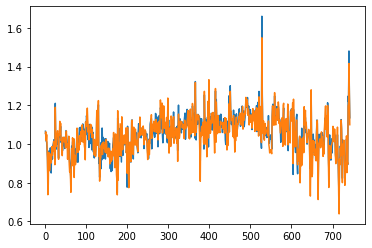

In [53]:
y_hat = model_Initial.predict(ivar[:])
print(y_hat.shape,dvar.shape)
x = np.linspace(1,742,742)
plt.plot(x,y_hat,label="model")
plt.plot(x,dvar,label="actual")
sample_data_route = "/Sample_data.csv"
sampled_data = pd.read_csv(sample_data_route)

In [56]:
sampled_data.columns

sample_ivar = sampled_data[['P82_OILSAND_MASS_VCALC', 'SB_MB_30M', 'SB_Fines_30M', 'SB_D50_30M',
       '82TI867', 'BYPASS', '300DI1002', '300AI1011', 'Breaker Water/Ore',
       'Froth underwash', 'froth temperature', 'L9 Feed HPW',
       'Sep cell underflow', 'Sep cell % speed', 'Middlings flow', 'HT Dens',
       'HT Temp', 'HPW Usage/Intensity', 'SB_CL', 'SB_BIT', '300DI1']]
sample_dvar = sampled_data[['F/O']]

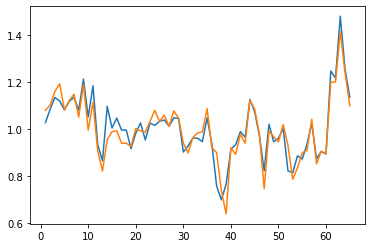

In [58]:
y_sample = model_Initial.predict(sample_ivar[:])
x = np.linspace(1,65,65)
plt.plot(x,y_sample,label="model_predict")
plt.plot(x,sample_dvar,label="actual")

Plant F/O production efficiency study:

K means, PCA enabled clustering is used to classify the data into 3 different groups and associated variable behaviors.

In [3]:
df = pd.read_csv('/bitumen_df.csv')
%matplotlib inline
df.drop('DATE',axis=1,inplace=True)
df.columns

Index(['SB_BIT', 'SB_FINES', 'TAIL LOSS', 'P300_PROD_FROTH_OSG_BIT_PCT', 'F/O',
       'SB_MB'],
      dtype='object')

In [4]:
# Normalize it
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)
segmentation_std

array([[ 0.82227274, -1.52131993, -0.69841878,  2.12309007, -0.40946793,
        -2.03789566],
       [ 0.8424897 , -1.33055062, -0.8424962 , -0.77415672,  0.39946792,
        -1.94925676],
       [ 1.0781207 , -1.77663305,  0.20973441,  1.63944036,  0.59254936,
        -1.203311  ],
       ...,
       [ 0.05433998,  0.37212423,  0.61107238,  0.41636346, -1.11237372,
        -0.3151433 ],
       [-0.07703778,  0.60758799,  0.98124338, -0.02077867, -1.13812061,
         0.48879228],
       [ 0.30716399,  0.80345358,  0.534525  , -0.04868393, -0.5087437 ,
         0.67281839]])

In [5]:
# Construct principal components
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.explained_variance_ratio_

array([9.65297935e-01, 3.44351256e-02, 1.89772081e-04, 7.11179464e-05,
       5.74886122e-06, 3.00460530e-07])

Text(0, 0.5, 'Cumulative Explained Variance')

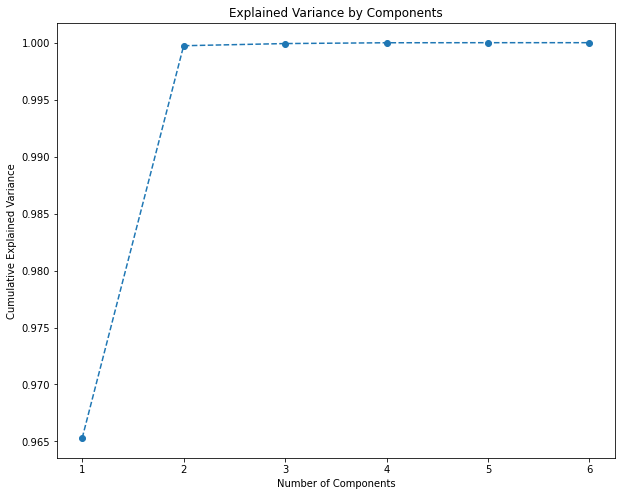

In [7]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7) , pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [8]:
# from the chart above, dataset is pretty much can be classified with 1 axis Principal component. (elbow)
# but for the sake of clustering, lets try to cluster into 3 main ones
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.transform(segmentation_std)
# pca.transform(df)

array([[-418.88211646, -172.36422006,   64.15208066],
       [-419.01865007, -172.2558145 ,   67.05188331],
       [-417.94311269, -171.57923635,   64.61995633],
       ...,
       [-417.50036146, -170.59748822,   65.91170454],
       [-417.09856595, -169.79633955,   66.354195  ],
       [-417.53775446, -169.59003196,   66.37521524]])

In [10]:
scores_pca = pca.transform(segmentation_std)
pd.DataFrame(pca.components_,columns=df.columns)

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB
0,-0.000737,0.002507,0.999269,-0.001266,-0.000090,0.038128
1,-0.007876,0.045833,-0.038210,-0.002222,-0.000741,0.998184
2,-0.030994,0.020632,-0.001208,-0.999298,0.001746,-0.003461


In [11]:
# Within-Cluster-Sum-of-Squares
wcss = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=22)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

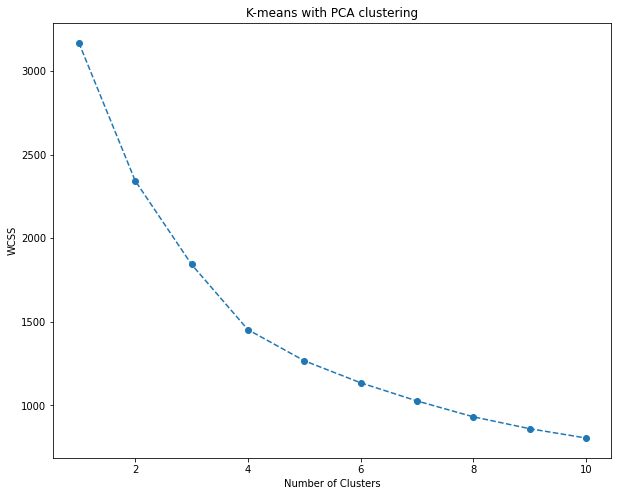

In [12]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11) , wcss, marker = 'o', linestyle = '--')
plt.title('K-means with PCA clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [24]:
# from the chart above, I would say elbow is around cluster 3 and after
# it seems major steepness (Within Cluster Sum Square) starts at Cluster 3. we keep first 3 clusters 
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=22)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [25]:
df_with_pca_cluster = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_with_pca_cluster.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_with_pca_cluster['K Means Cluster #'] = kmeans_pca.labels_
df_with_pca_cluster.head()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
0,12.366241,11.886986,304.753479,69.730003,1.024637,126.016984,-418.882116,-172.364220,64.152081,1
1,12.376707,12.246460,282.760101,63.500000,1.098350,128.621417,-419.018650,-172.255815,67.051883,1
2,12.498686,11.405890,443.382812,68.690002,1.115944,150.539168,-417.943113,-171.579236,64.619956,1
3,12.655671,10.514458,376.271484,64.440002,1.060398,130.771433,-418.406938,-172.253215,66.577657,1
4,12.674402,11.581719,400.369812,65.690002,1.045395,121.961980,-418.259946,-172.534018,66.007880,1


In [26]:
df_with_pca_cluster['Segment'] = df_with_pca_cluster['K Means Cluster #'].map({0:'first',1:'second',2:'third'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


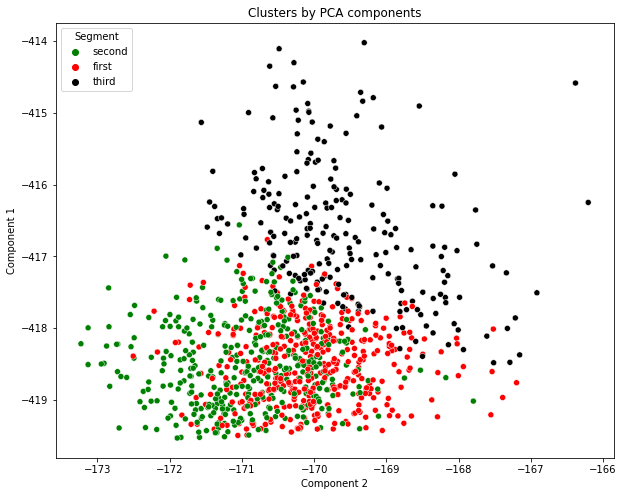

In [29]:
# PC1 vs PC2 - vary this to view 
x_axis = df_with_pca_cluster['Component 2']
y_axis = df_with_pca_cluster['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_with_pca_cluster['Segment'],palette= ['g','r','k'])
plt.title('Clusters by PCA components')
plt.show()

In [30]:
df_cluster = df_with_pca_cluster.set_index('Segment')

In [31]:
cluster_1 = df_cluster.loc['first']
cluster_2 = df_cluster.loc['second']
cluster_3 = df_cluster.loc['third']


In [32]:
cluster_1.describe()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.0
mean,11.872560,15.028687,347.847231,63.629416,1.063229,191.551301,-418.506541,-170.058754,67.043787,0.0
std,0.459896,1.585441,82.940388,1.453022,0.097540,23.528696,0.543253,0.824082,0.672836,0.0
min,10.412600,10.997859,201.425247,60.090000,0.831052,122.010926,-419.496571,-172.503784,65.102777,0.0
25%,11.564725,13.937739,283.264572,62.605001,0.997549,176.814204,-418.923375,-170.602038,66.577627,0.0
50%,11.902925,14.952374,342.013214,63.770000,1.065729,190.716288,-418.537081,-170.069698,66.981612,0.0
75%,12.200084,16.015057,406.462738,64.639999,1.132305,205.712827,-418.117499,-169.543176,67.514325,0.0
max,13.005706,21.213738,616.090271,67.970001,1.292689,272.490226,-416.767323,-167.197506,68.709252,0.0


In [33]:
cluster_2.describe()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.0
mean,12.177948,13.790018,354.983466,66.801974,1.078964,167.612089,-418.494857,-170.911986,65.540651,1.0
std,0.486663,1.745298,90.289380,1.428753,0.080486,24.610988,0.591952,0.869053,0.658872,0.0
min,10.679017,9.416021,201.339813,63.009998,0.802657,102.740647,-419.532517,-173.227238,64.135860,1.0
25%,11.860364,12.624451,283.242050,65.802502,1.026228,151.668482,-418.946158,-171.485434,65.085813,1.0
50%,12.151476,13.924723,343.277527,66.720001,1.079304,168.449870,-418.564013,-170.875565,65.578698,1.0
75%,12.496017,15.103936,421.356018,67.807499,1.129271,185.972627,-418.044552,-170.272504,66.031039,1.0
max,13.470199,18.184196,650.807251,69.800003,1.280801,256.370105,-416.562302,-167.795338,67.263747,1.0


In [34]:
cluster_3.describe()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.0
mean,11.654627,15.916461,624.181660,65.131283,1.030259,207.160757,-416.676719,-169.574013,66.363949,2.0
std,0.489980,1.804043,146.147053,2.185339,0.088603,28.152806,0.942537,1.005472,1.014772,0.0
min,10.403407,10.851097,336.152313,60.299999,0.802986,150.257663,-418.483280,-171.561235,64.302426,2.0
25%,11.330338,14.716724,522.712906,63.650000,0.963266,188.858473,-417.337466,-170.246623,65.593888,2.0
50%,11.592517,15.467259,610.290070,65.090000,1.029556,202.543601,-416.787725,-169.763520,66.383005,2.0
75%,12.036673,17.178691,705.551346,66.787500,1.089730,225.399038,-416.176015,-168.945618,67.063934,2.0
max,12.833962,20.738810,1027.158569,69.500000,1.276768,303.919308,-414.022599,-166.205548,68.651047,2.0


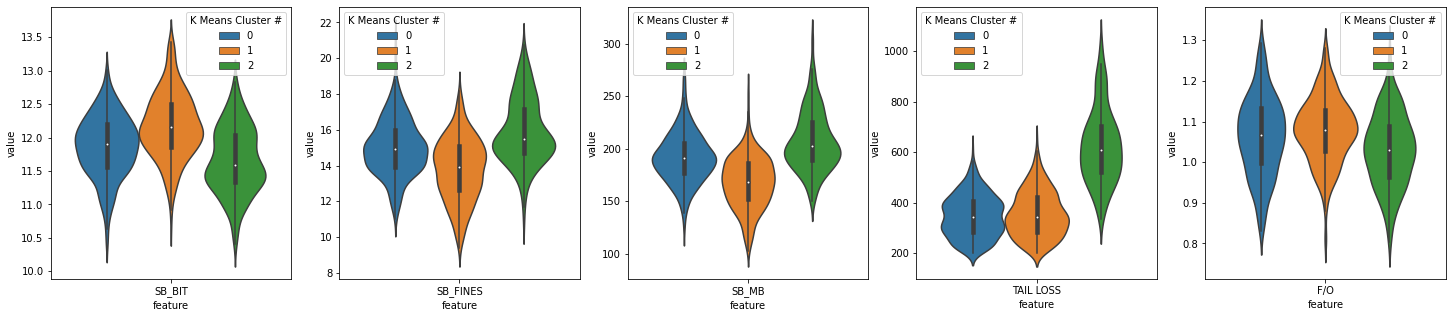

In [35]:
# not filtering training data from 2019 to 2020
feat_evaluate = ["SB_BIT", "SB_FINES","SB_MB", "TAIL LOSS","F/O"]
fig, ax = plt.subplots(1,5,figsize=(25,5))

for i in range(len(feat_evaluate)):
  df = df_with_pca_cluster[[feat_evaluate[i], "K Means Cluster #"]]
  df_long = pd.melt(df, "K Means Cluster #", var_name="feature", value_name="value")
  sns.violinplot(x="feature", hue="K Means Cluster #", y="value", data=df_long, ax=ax[i])

from this method, cluster 0 and cluster 1 is similar, and the major difference is that cluster 3 has higher tails loss, MB, Fines than the other cluster, 

lower bitumen content from the feed. this means that the procesability of the feed and its associated plant reaction can be clearly classified.

with the cluster 0-1 type feed is expected to be inevitable, there is a need for new operational gudiance to react to the deteriorating feed.